## Python statistics essential training - 03_04_twovariables

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


We want to find possible relationships among 2 variables (correlation, causation) - explain the variation in a response variable as function of the variation in the explanatory variable.

In [6]:
#plot a variable as a date
italy = gapminder.query('country == "Italy"')

In [7]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


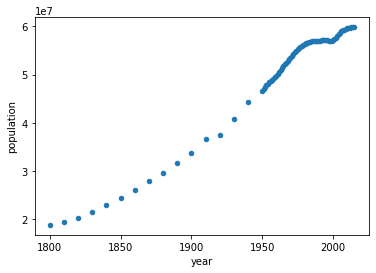

In [8]:
italy.plot.scatter("year","population")

In [9]:
#plot becomes denser after 1950 .. increase in population density

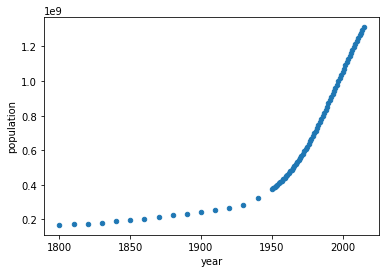

In [10]:
gapminder.query('country == "India"').plot.scatter("year","population")

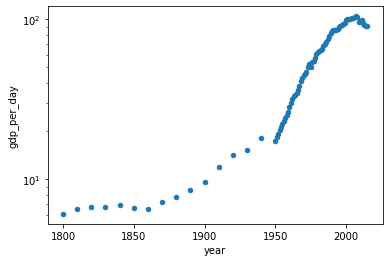

In [13]:
#let's look at income per person per day
#use logarithm of income (logy)
italy.plot.scatter("year","gdp_per_day",logy=True)

The last 20 years have been disappointing (detrending in GDP over year)

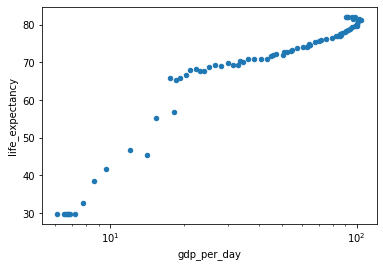

In [14]:
#let's look at income per person per day compared to quality of life 
# - i.e. life expectancy
italy.plot.scatter("gdp_per_day","life_expectancy",logx=True)

We see that even though income seems to be decreasing, life expectancy continues to grow

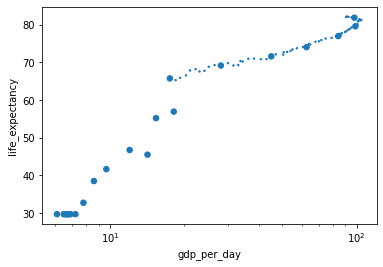

In [17]:
#We can mark decades by changing the size of the dots
size = np.where(italy.year % 10 == 0,30,2)
italy.plot.scatter("gdp_per_day","life_expectancy",logx=True, s=size)

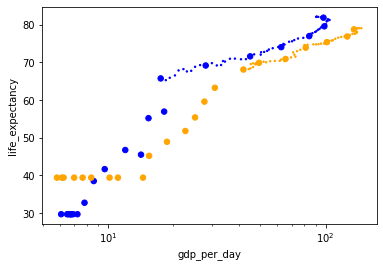

In [18]:
# we can plot Italy and US together
data = gapminder.query('(country == "Italy") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange') #blue, else orange
data.plot.scatter("gdp_per_day","life_expectancy",logx=True, s=size,c=color)

Italy and US are similar trend of increased GDP and life expectancy, with Italy falling shorter with US consistently richer, but US life expectancy less healthy

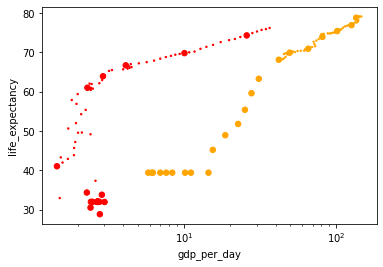

In [19]:
# How about China and the US? We just need to make slight modification to code

# we can plot China and US together
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange') #blue, else orange
data.plot.scatter("gdp_per_day","life_expectancy",logx=True, s=size,c=color)

We see there are a cluster of points in the bottom left for China population.
We can connect this scatterplot to understand this better. We can add a line plot on top of the scatterplot.

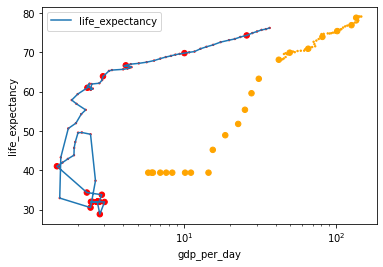

In [24]:
data = gapminder.query('(country == "China") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange') #blue, else orange

#save the object returned by plot.scatter - a matplotlib axis object
#and pass it to the plot.line
ax = data.plot.scatter("gdp_per_day","life_expectancy",logx=True, s=size,c=color)
data[data.country == 'China'].plot.line(x="gdp_per_day",y="life_expectancy",ax=ax)

In [22]:
help(data.plot.line)

Help on method line in module pandas.plotting._core:

line(x=None, y=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.
    
    This function is useful to plot lines using DataFrame's values
    as coordinates.
    
    Parameters
    ----------
    x : int or str, optional
        Columns to use for the horizontal axis.
        Either the location or the label of the columns to be used.
        By default, it will use the DataFrame indices.
    y : int, str, or list of them, optional
        The values to be plotted.
        Either the location or the label of the columns to be used.
        By default, it will use the remaining DataFrame numeric columns.
    **kwargs
        Keyword arguments to pass on to :meth:`DataFrame.plot`.
    
    Returns
    -------
    :class:`matplotlib.axes.Axes` or :class:`numpy.ndarray`
        Return an ndarray when ``subplots=True``.
    
    See Also
    --------
    matplotlib.pyplot.plot : 